In [1]:
import gym
import gym_tictactoe
from gym import wrappers
import numpy as np
import matplotlib.pyplot as plt
import operator
import itertools
import random

In [2]:
GAMMA = 0.9
ALPHA = 0.01
COUNTLIMIT = 200

In [3]:
def max_dict(d):
    
    max_key, max_v = max(d.items(), key = operator.itemgetter(1))
    
    return max_key, max_v

In [4]:
def get_state_as_string(state):
    
    string_state = ''.join(state['board'].flatten()) 
    
    return string_state

In [5]:
def get_all_states_as_string():
    
    block = [' ', 'X', 'O']
    states = [''.join(i) for i in itertools.product(block, repeat = 9)]

    return states

In [6]:
def intialize_Q(env):
    
    Q = {}
    
    all_states = get_all_states_as_string()
    
    for state in all_states:
        
        Q[state] = {}
        
        for action in range(env.action_space.n):
            Q[state][action] = 0
            
    return Q

In [7]:
def play_one_game(env, Q, eps=0.5, render = False, learner = 'O'):
    
    observation = env.reset(player = learner)
    done = False
    
    count = 0
    total_reward = 0
   
    state = get_state_as_string(observation)
    
    while not done:
        
        count = count + 1
        
        if render:
            env.render()
            print()
        
        
        if np.random.uniform() < eps:
            action = env.action_space.sample()
        else:
            action = max_dict(Q[state])[0]

        observation, reward, done, _ = env.step(action)

        total_reward += reward

        state_new = get_state_as_string(observation)

        a1, max_q_s1a1 = max_dict(Q[state_new])

        Q[state][action] += ALPHA * (reward + GAMMA * max_q_s1a1 - Q[state][action])

        state, action = state_new, a1


    if render:
        env.render()
            
        
    return total_reward, count 

In [8]:
def play_many_games(env, N=50000):
    
    Q = intialize_Q(env)
    
    length = []
    reward_total = []
    
    for n in range(N):
        
        eps = 1.0 / np.sqrt(n + 1) # take random action less over time
        
        if n % 2 == 0:
            learner = 'X'
        else:
            learner = 'O'
        
        episode_reward, episode_length = play_one_game(env, Q, eps, False, learner)
        
        if n % 10000 == 0:
            print('run: {}, L:{}, {}:{:2f}'.format(n, episode_length, learner, episode_reward))
            
        length.append(episode_length)
        reward_total.append(episode_reward)

        
#     env1 = wrappers.Monitor(env, 'MovieFiles', force=True)
#     observation = env1.reset()
#     play_one_game(env1, Q, eps, True)
        
    return length, reward_total, Q

In [9]:
def plot_running_avg(total_rewards, run_size):
    
    N = len(total_rewards)
    
    running_avg = np.empty(N)
    
    for t in range(N):
        
        running_avg[t] = np.mean(total_rewards[max(0,t-run_size) : (t+1)])
        
    plt.plot(running_avg)
    plt.title('Running Average')
    plt.show()

run: 0, L:3, X:-100.000000


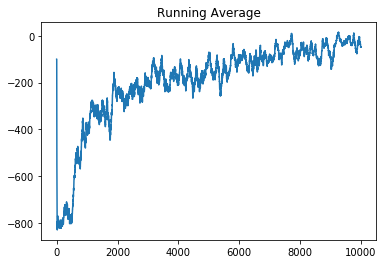

In [10]:
env = gym.make('tictactoe-v0')
length, reward_total, Q = play_many_games(env)
plot_running_avg(reward_total, 100)

In [11]:
play_one_game(env, Q, eps = 0.0, render = True, learner = 'O')

Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/luis/anaconda3/envs/tf-source-keras-gym/lib/python3.6/tkinter/__init__.py", line 1699, in __call__
    return self.func(*args)
  File "/home/luis/anaconda3/envs/tf-source-keras-gym/lib/python3.6/tkinter/__init__.py", line 745, in callit
    func(*args)
TypeError: tick() missing 2 required positional arguments: 'board' and 'tk'


Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/luis/anaconda3/envs/tf-source-keras-gym/lib/python3.6/tkinter/__init__.py", line 1699, in __call__
    return self.func(*args)
  File "/home/luis/anaconda3/envs/tf-source-keras-gym/lib/python3.6/tkinter/__init__.py", line 745, in callit
    func(*args)
TypeError: tick() missing 2 required positional arguments: 'board' and 'tk'


Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/luis/anaconda3/envs/tf-source-keras-gym/lib/python3.6/tkinter/__init__.py", line 1699, in __call__
    return self.func(*args)
  File "/home/luis/anaconda3/envs/tf-source-keras-gym/lib/python3.6/tkinter/__init__.py", line 745, in callit
    func(*args)
TypeError: tick() missing 2 required positional arguments: 'board' and 'tk'


Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/luis/anaconda3/envs/tf-source-keras-gym/lib/python3.6/tkinter/__init__.py", line 1699, in __call__
    return self.func(*args)
  File "/home/luis/anaconda3/envs/tf-source-keras-gym/lib/python3.6/tkinter/__init__.py", line 745, in callit
    func(*args)
TypeError: tick() missing 2 required positional arguments: 'board' and 'tk'


Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/luis/anaconda3/envs/tf-source-keras-gym/lib/python3.6/tkinter/__init__.py", line 1699, in __call__
    return self.func(*args)
  File "/home/luis/anaconda3/envs/tf-source-keras-gym/lib/python3.6/tkinter/__init__.py", line 745, in callit
    func(*args)
TypeError: tick() missing 2 required positional arguments: 'board' and 'tk'


(0, 4)